<a href="https://colab.research.google.com/github/sheng-999/Stats_test/blob/upload/Statistical_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical tests

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset is real data. It contains more features than what we need but lets you pratice more in the future if you want to.

You can find data description [on this website](https://www.kaggle.com/competitions/home-data-for-ml-course/data).

## Distribution


a) Download [`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing) and import data into `df` variable.




In [1]:
import pandas as pd
df = pd.read_csv('/content/Iowa_housing_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

b) We want to study `SalePrice` repartition.
Use Plotly Express to do so.


In [6]:
import plotly.express as px

In [19]:
df_price = df['SalePrice']
fig = px.histogram(df_price,
                   title = 'Sale Price'
             )

fig.show()

c) Does `SalePrice follow a normal distribution? Are there any outliers?

It seems like Gamma distribution, there are several outliers like saleprice greater than 400k ...

d) How do you calculate quantiles with Pandas? Calculate 10% quantile of `SalePrice` variable (the price at which 10% of the houses in the dataset fall below)

In [16]:
df_price.quantile(
    q=0.1
)

106475.0

e) Look at `histnorm` parameter of `px.histogram()` function. What does it do? Try "probability".

In [21]:
fig = px.histogram(df_price,
                   # 选择标准化方式
                   histnorm = 'probability'
             )
fig.show()

f) We will now use statistics to determine if the data follows a normal distribution or not.
Execute the cell below and interpret the result based on p-value.

- H0 hypothesis: sample comes from a normal distribution
- H1: H0 is false

In [22]:
from scipy import stats

# Agostino and Pearson’s test
k2, pvalue = stats.normaltest(df["SalePrice"])

print(pvalue)

2.283848353787728e-133


In [23]:
print(pvalue < 0.05) # test if's in confidential interval(95%) or not.

True


The P-Value < risk level so that we can reject H0 hypothesis which means the sample does not come from a normal distribution

g) Another chart is very useful for seeing the repartition: the box ploting.

We want to observe relation between `OverallQual` and `SalePrice`. Create a boxplot with Plotly Express and interpret the results.

In [ ]:
df[['SalePrice','OverallQual']]

In [32]:
px.box(
    x = df['OverallQual'],
    y = df['SalePrice'],
    labels = {'x': 'Overall material and finish quality', 'y':"Saleprice"}
)


It seems they have a correlation positif. The higher quality is, the higher price is.


The thing that makes this chart so powerful with Plotly Express is that for each OverallQual category we have a statistic summary of the distribution.

h) What is the third quartile of OverallQual=7?

231.125k

i) What does lower and upper fence mean?

lower & upper fence is the seperation value between "normal" distribution. If the values not in the range lower & upper fence, it could be considered as outliers

## Correlation

a) What does `df.corr()` do? How many features do you have?

Depending on the version of Pandas you have installed, you may only have numerical features.

In [33]:
df.corr()
# correlation : we use it to analyse the relationship between 1 independent continuous variable and 1 dependent continuous variable
# we have 37 columns - features, 1 target 'SalePrice'

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


b) As always, it's almost impossible to use those data without a proper visualisation. Use `px.imshow()` to visualize it.

Make sure you use sufficient width and height settings to see all the features of the houses.

In [44]:
import seaborn as sns

In [64]:
df_new = df.drop(columns = ['SalePrice'])
px.imshow(
          df.corr(),   # to show the correlation with heatmap
          width = 800,
          height= 800
          )

<ipython-input-64-94afbb18a8e5>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



c) We can now see which feature is correlated or not with `SalePrice` but between other features as well.

What is the correlation between `Id` and `SalePrice`? Why?

The cor-value is -0.02 which means there's no relation between id & SalePrice

d) Are there any feature negatively correlated with `SalePrice`?

ID,YsSold,MSSubClass,OverallCond,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,MiscVal




e) What do you think of the correlation between `GrLivArea` and `SalePrice`? Is it a surprise?

The value is 0.7086. There's a correlation between these. It's not a surprise because it's normal when price change with living area surface.

f) Use `px.scatter()` function to display a scatterplot between `GrLivArea` and `SalePrice`.

In [68]:
px.scatter(
    x=df['GrLivArea'],
    y=df['SalePrice'],
    labels = {'x':'Living Area', 'y': 'Sale Price'},
    title = 'Price with Living Area',

)

g) What does `trendline` parameter do?

Replot your chart using it. Hover your mouse over the line in the chart, what do you see?

We will cover regressions in more detail in the next day's lecture.

In [76]:
px.scatter(
    x=df['GrLivArea'],
    y=df['SalePrice'],
    labels = {'x':'Living Area', 'y': 'Sale Price'},
    title = 'Price with Living Area',
    # add trendline
    trendline = 'ols',
    trendline_color_override='red'
)

# The trendline is y = 107.13 * x + 18569 and R^2 is 0.5 which means the correlation is good

h) **Be careful, correlation doesn't mean causality!**

It is very important to bear this in mind so as not to draw the wrong conclusions.

Go to [this website](https://www.tylervigen.com/spurious-correlations) and pick the most absurd correlation of your choice.

## Statistical tests

Statistical tests are useful to tell us if a difference is statistically significant.

a) Let's study the impact of `Neighborhood` on `SalePrice`.

Plot a histogram of `SalePrice` and pass `Neighborhood` in color parameter. Play with the chart to visually see that some Neighborhoods have different repartition.

In [91]:
px.histogram(
    x= df['Neighborhood'],
    y= df['SalePrice'],
    color = df.Neighborhood,
    labels ={'x': "Neighborhood", 'y': 'Sale Price'}
)

b) What statistical tests do you propose to verify statistically that there is a price difference between IDOTRR and ClearCr neighborhood?

Can we do a Z-test?



*   ClearCr has 28 rows, ok for T-test
*   IDOTRR has 37 rows, ok for Z-test



In [93]:
df_ClearCr = df[df['Neighborhood']=='ClearCr']
df_IDOTRR  = df[df['Neighborhood']=='IDOTRR']

c) Implement a t-test.
What can you conclude if we accept a 5% risk?

Hint: test first if standard devations are equal to test if variances are similar.

In [104]:
import numpy as np
import scipy.stats as stats

In [106]:
 # Calculate the T-test for the means of two independent samples of scores
t_score, pvalue = stats.ttest_ind(
        # to test price difference
    a=df_ClearCr['SalePrice'],
    b=df_IDOTRR['SalePrice'],
    equal_var=True)


print(f't score:{t_score}, p-value: {pvalue}')
print(pvalue < 0.05)

# we could reject H0 which means there's a relation in these two areas

t score:10.830419538297502, p-value: 5.080325887282466e-16
True


d) We will now study the influence of `Foundation` on `SalePrice`.

Make a boxplot plotting `SalePrice` against `Foundation`.

In [107]:
px.box(
    x=df['Foundation'],
    y=df['SalePrice'],
    labels = {'x': 'Foundation', 'y':'Sale Price'}
)

e) How many samples are there per type of foundation?

In [111]:
df.groupby('Foundation')['SalePrice'].count()

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: SalePrice, dtype: int64

f) Only `Brktil`, `CBlock`and `Pconc` have enough samples to use statistical tests.

Are house prices significantly different among those three types of Foundation?
Which test should you use? What can you conclude?

Hint: check the distributions using `stats.normaltest` to make sure you can choose the right test! Refer to the lecture slides if unsure!

In [128]:
# to compare among multiple variables, we need anova test: f_oneway().
df_Brktil = df[df['Foundation'] =='BrkTil']
df_Cblock = df[df['Foundation'] =='CBlock']
df_PConc  = df[df['Foundation'] =='PConc']

brk_test = stats.normaltest(df_Brktil['SalePrice'])
cbl_test = stats.normaltest(df_Cblock['SalePrice'])
pc_test  = stats.normaltest(df_PConc['SalePrice'])
print(brk_test, cbl_test, pc_test)

# dfwood = df[df['Foundation'] =='Wood']
# wood_test  = stats.normaltest(dfwood['SalePrice'], axis = 0)
# skewtest is not valid with less than 8 samples; 3 samples

NormaltestResult(statistic=98.90974400166029, pvalue=3.3267639510785644e-22) NormaltestResult(statistic=207.51213687015377, pvalue=8.695849498154729e-46) NormaltestResult(statistic=261.85183814901325, pvalue=1.3791001567427582e-57)


In [126]:
a_score, p_value = stats.f_oneway(
    df_Brktil['SalePrice'],
    df_Cblock['SalePrice'],
    df_PConc['SalePrice'])

print(f'A-score: {a_score}, p-value: {p_value}')
print(p_value < 0.05)

# True, reject H0, there's an altertive relationship

A-score: 233.7595837374714, p-value: 1.6212905812533462e-88
True


g) Study the impact of `CentralAir`- Y or N. Which test should you use? What can you conclude?

In [133]:
df.groupby('CentralAir')['SalePrice'].count()

CentralAir
N      95
Y    1365
Name: SalePrice, dtype: int64

In [145]:
from statsmodels.stats.weightstats import ztest

# we need to replace str into int cause str are unsupported for test
df_Y = df[df['CentralAir'] =='Y']
df_N = df[df['CentralAir'] =='N']

z_score, p_value = ztest(
    df_Y['SalePrice'],
    df_N['SalePrice'])

print(f'Z-score : {z_score}, P-value : {p_value}')
print(p_value < 0.05)

Z-score : 9.914905121389344, P-value : 3.585969966245065e-23
True




*   We can use T-test or Z-test



h) Study the impact of `LotConfig` - Inside or Corner. Which test should you use? What can you conclude if we accept a maximum risk of 5%?

In [134]:
df.groupby('LotConfig')['SalePrice'].count()
# Only Inside,Corer,CulDsac could be used for anova test.

LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: SalePrice, dtype: int64

In [146]:
df_co = df[df['LotConfig'] == 'Corner']
df_in = df[df['LotConfig'] == 'Inside']
df_cu = df[df['LotConfig'] == 'CulDSac']

a_score, p_value = stats.f_oneway(
    df_co['SalePrice'],
    df_in['SalePrice'],
    df_cu['SalePrice'])

print(f'A-score: {a_score}, p-value: {p_value}')
print(p_value < 0.05)

# True, reject H0, there's an altertive relationship

A-score: 15.160291081623821, p-value: 3.061664390718219e-07
True


i) Read [this article](https://media.nature.com/original/magazine-assets/d41586-019-00857-9/d41586-019-00857-9.pdf) up to "(see Beware false conclusions)". In this challenge we set the significance level at 5%. Depending on the context in which you work, you might need to use another signficance level.

j) Dabl is a handy library that allows you to quickly visualize the relationships of all features. It shows only the top 10 continuous and top 10 categorical features, which can be enough for a small dataset. Otherwise you need to slice your data. Execute the cells below (this might take a minute or so) and have a look at the charts. (In some cases you might need to restart your kernel if the result isn't shown.)

In [137]:
!pip install dabl
!pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:692: UserWarning:

Dropped 2 outliers in column SalePrice.

/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:652: UserWarning:

Discarding 2 outliers in target column.

/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:111: UserWarning:

Showing only top 10 continuous features.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Showing only top 10 of 44 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='SalePrice', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.09E-01'}, xlabel='OverallQual (jittered)', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=7.30E-01'}, xlabel='GrLivArea'>,
         <Axes: title={'center': 'F=6.53E-01'}, xlabel='YearBuilt'>,
         <Axes: title={'center': 'F=6.48E-01'}, xlabel='GarageArea'>,
         <Axes: title={'center': 'F=6.01E-01'}, xlabel='TotalBsmtSF'>],
        [<Axes: title={'center': 'F=5.94E-01'}, xlabel='GarageYrBlt', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=5.74E-01'}, xlabel='1stFlrSF'>,
         <Axes: title={'center': 'F=5.72E-01'}, xlabel='YearRemodAdd'>,
         <Axes: title={'center': 'F=5.31E-01'}, xlabel='TotRmsAbvGrd (jittered)'>,
         <Axes: title={'center': 'F=4.77E-01'}, xlabel='OpenPorchSF'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.30E-01'}, xlabel='SalePrice', ylabel='MSSubClass'>,
         <Axes: title={'cente

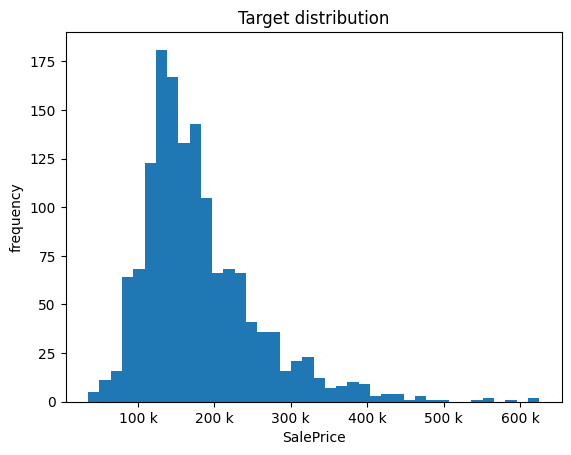

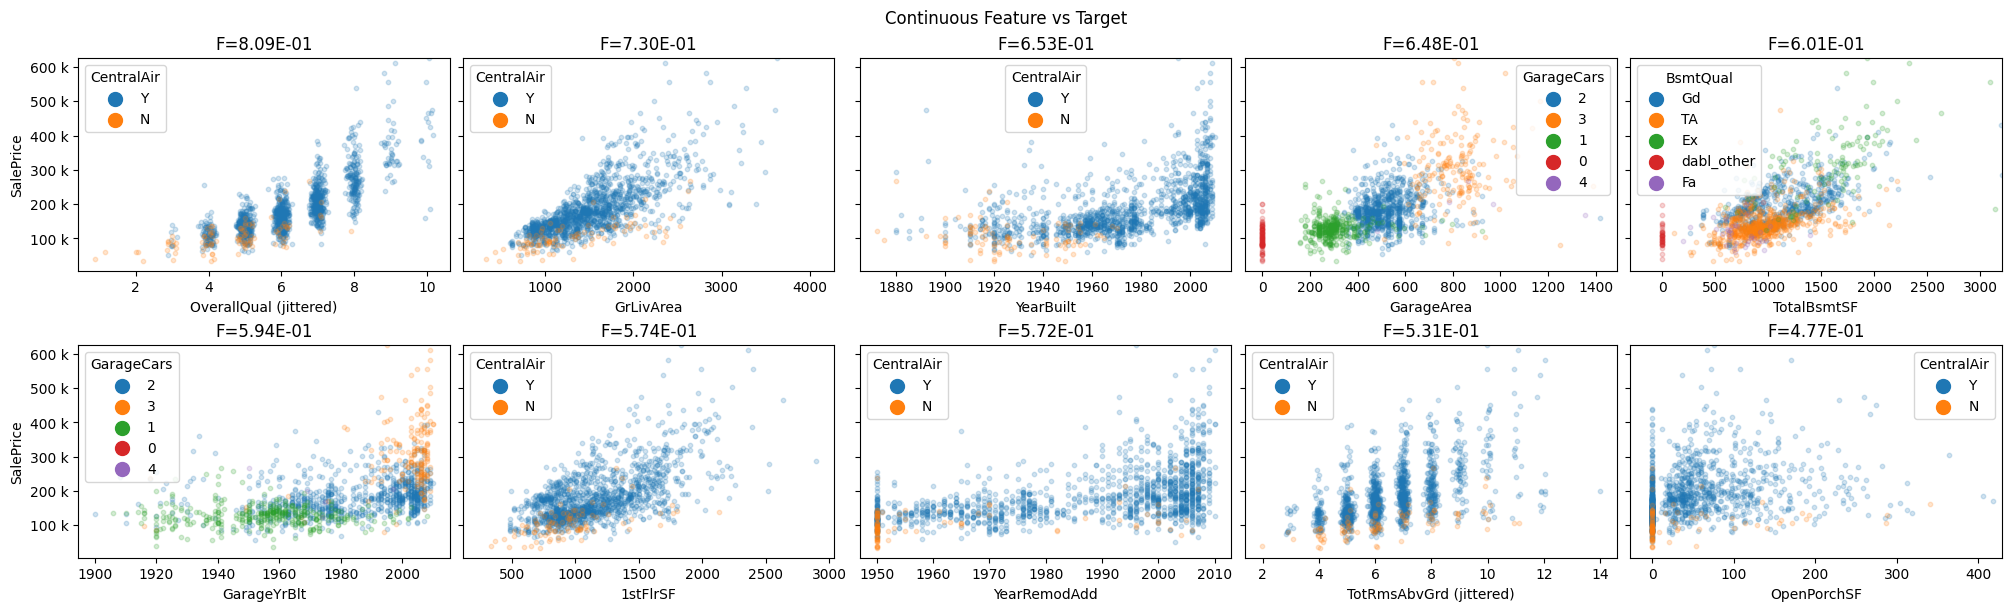

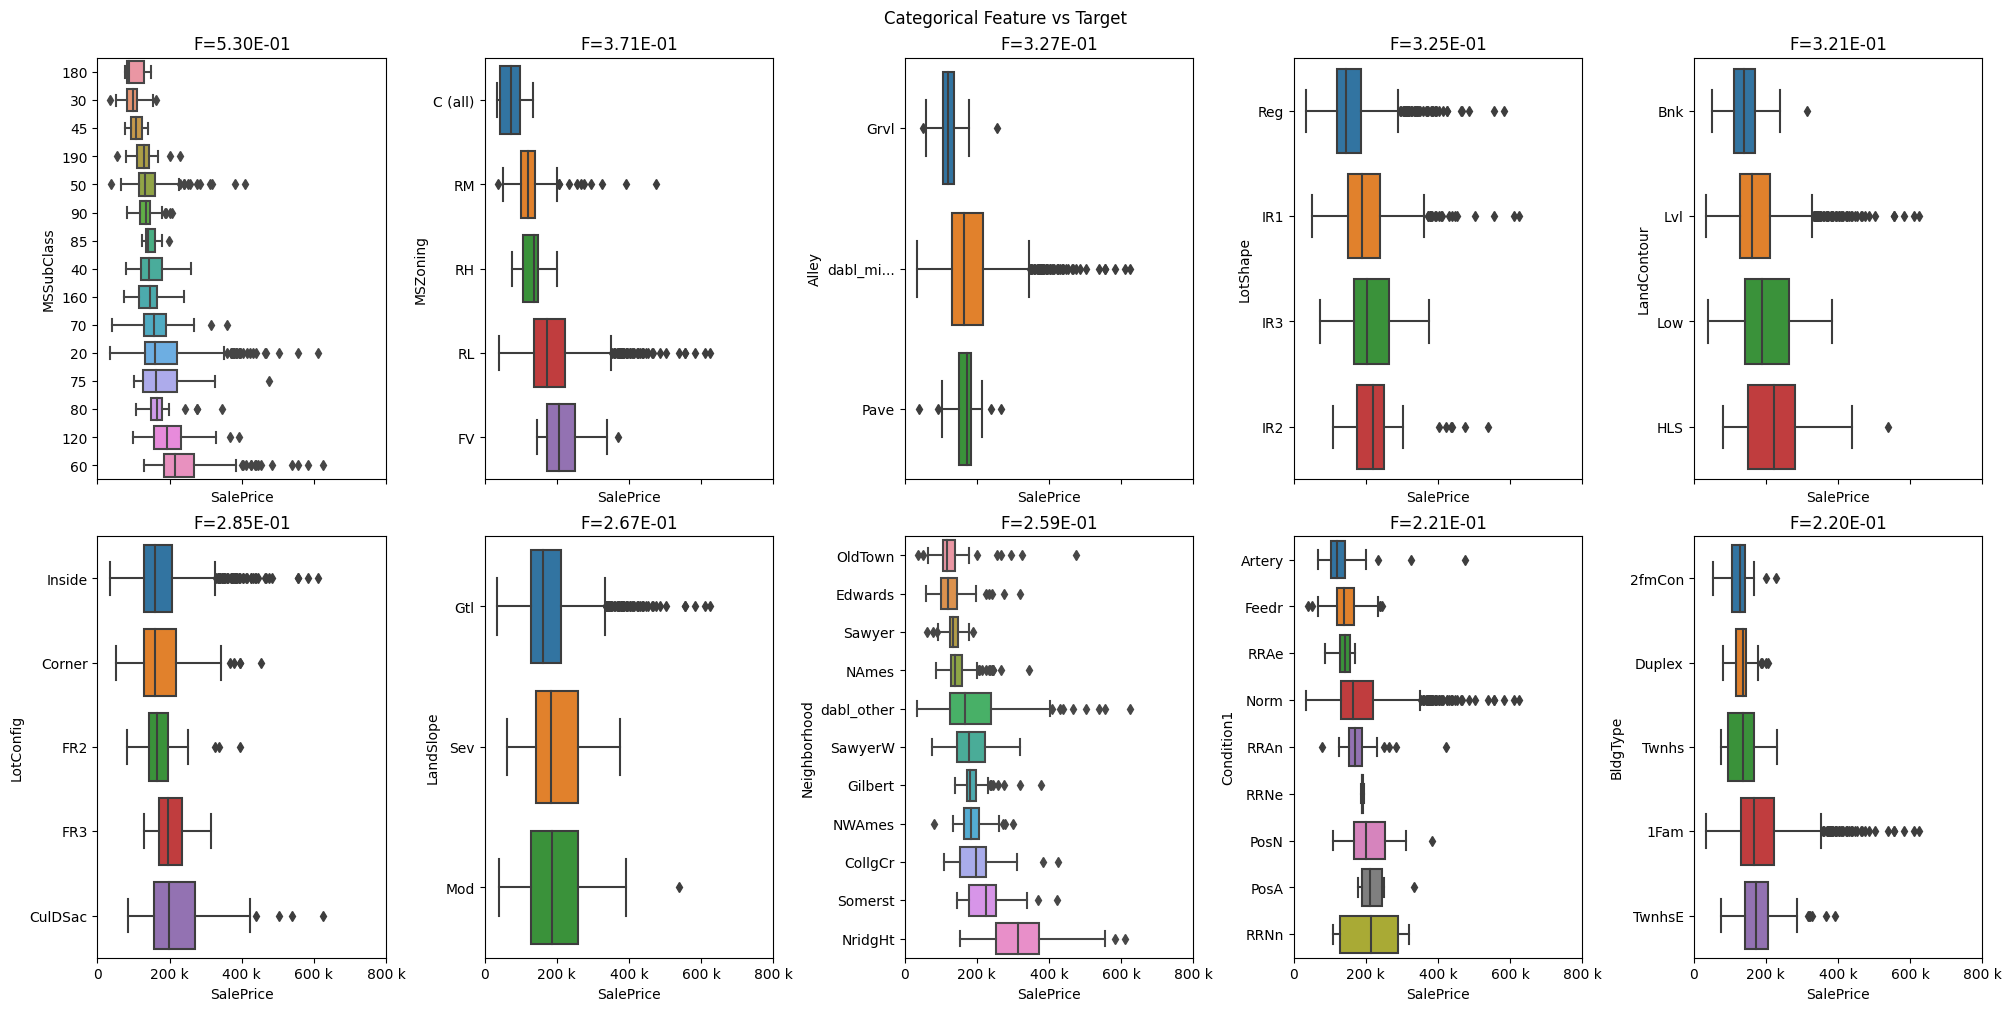

In [147]:
import dabl

dabl.plot(df, target_col = 'SalePrice', verbose=100)